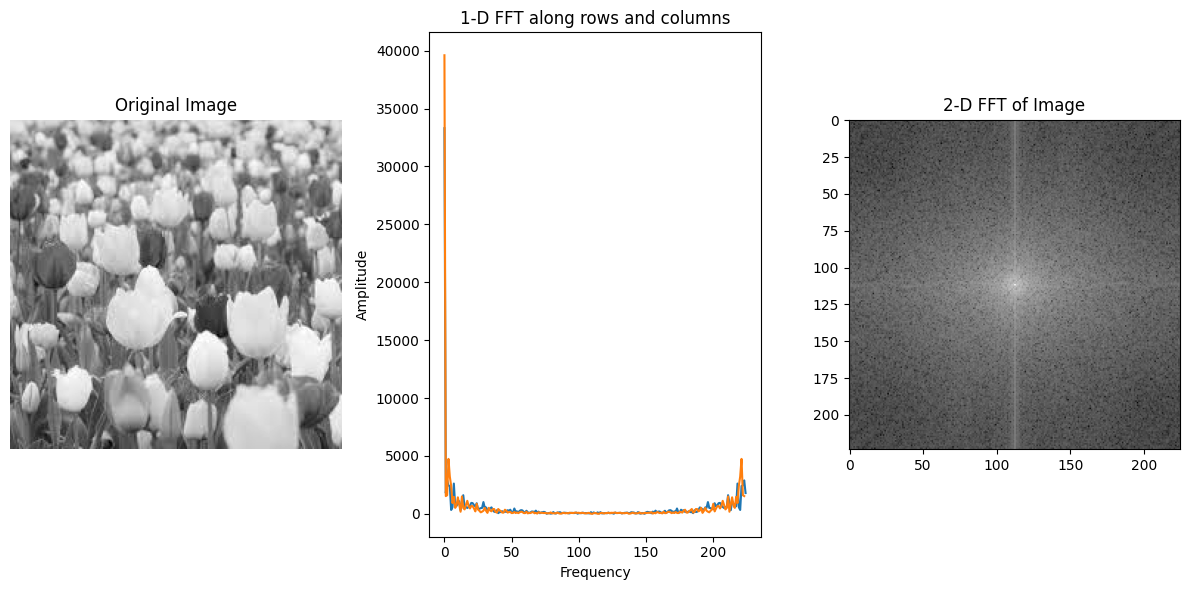

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./images/flower2.jpeg',0)

fft_row = np.fft.fft(img,axis=1)
fft_c = np.fft.fft(img,axis=0)

plt.figure(figsize=(12,6))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.title('1-D FFT along rows and columns')
plt.plot(np.abs(fft_row[100]),label='Row fft')
plt.plot(np.abs(fft_c[:,100]),label='columnb fft')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

fft_img = np.fft.fft2(img)
fft_shifted_img = np.fft.fftshift(fft_img)
magnitude_spectrum = 20 *np.log(abs(fft_shifted_img))
plt.subplot(133)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('2-D FFT of Image')

plt.tight_layout()
plt.show()